# Exploratory Data Analysis and Feature Transformation/Creation

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn import linear_model

from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

from sklearn.model_selection import GroupShuffleSplit, ShuffleSplit, GridSearchCV, GroupKFold
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, \
AdaBoostRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Show all columns
pd.set_option('display.max_columns', None)

# Display plots inline
%matplotlib inline

# Load data and apply basic filters
df = pd.DataFrame.from_csv('predata.csv')
df = df.loc[df['MIN'] >= 100]
df = df.loc[df['Age'] >= 17.25]
df['Valid'] = df['Drafted'] - df['Season']
df = df.loc[df['Valid'] >= 0]
df['WSTOT'].fillna(0, inplace=True)

print "Number of samples:", len(df)
print "Number of features:", len(df.columns)

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Number of samples: 1972
Number of features: 72


## Remove Outliers

In [2]:
# Use sorting method to find outliers
df.sort('2P%', ascending=False).head(10)[['Name', 'Season', '2P%']]

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Name,Season,2P%
1341,Francisco Garcia,2004.0,1.076553
2637,Marc Gasol,2006.0,0.683740
2928,Nemanja Bjelica,2010.0,0.676031
2943,Nemanja Nedovic,2010.0,0.674952
3534,Rudy Gobert,2013.0,0.654859
1366,Furkan Aldemir,2010.0,0.651086
4183,Vernon Macklin,2007.0,0.647926
2066,Jonas Valanciunas,2010.0,0.645378
3723,Sergio Llull,2009.0,0.644787
2495,Lonzo Ball,2017.0,0.639881


In [3]:
df.sort('3P%', ascending=False).head(6)[['Name', 'Season', '3P%']]

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Name,Season,3P%
3117,Pape Sow,2003.0,1.001198
3952,Tiago Splitter,2007.0,0.917768
3566,Ryan Reid,2008.0,0.825591
552,Cedric Simmons,2006.0,0.825591
3556,Ryan Hollins,2005.0,0.825591
3506,Roy Hibbert,2008.0,0.825591


In [4]:
# Calculate TS and Sort
df['TS'] = df['PTS']/ (2*(df['FGA'] + 0.44*df['FTA']))
df.sort('TS', ascending=False).head(15)[['Name', 'Season', 'TS']]

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Name,Season,TS
3862,Steve Novak,2004.0,1.146720
4038,Travis Diener,2004.0,0.733271
1341,Francisco Garcia,2004.0,0.671353
2928,Nemanja Bjelica,2010.0,0.637065
2637,Marc Gasol,2006.0,0.629850
3723,Sergio Llull,2009.0,0.614716
3516,Rudy Fernandez,2007.0,0.604649
3444,Rodney Carney,2004.0,0.599714
407,Bojan Bogdanovic,2010.0,0.594626
3861,Steve Novak,2003.0,0.588249


In [5]:
# Drop low quality data
df.drop([3862, 4038, 1341, 3444, 291, 3117], inplace=True)

In [6]:
# Max out 3P% at 75%
list3p = list(df['3P%'])
list3p_fixed = []
for item in list3p:
    if item >= 0.75:
        list3p_fixed.append(np.mean(list3p))
    else:
        list3p_fixed.append(item)
df['3P%'] = list3p_fixed

In [7]:
# Max out TS at 70%
listTS = list(df['TS'])
listTS_fixed = []
for item in listTS:
    if item >= 0.70:
        listTS_fixed.append(0.70)
    else:
        listTS_fixed.append(item)
df['TS'] = listTS_fixed

In [8]:
df.sort('Speed', ascending=True).head(8)[['Name', 'Speed']]

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Name,Speed
2902,Nate Robinson,2.96
2903,Nate Robinson,2.96
3802,Sonny Weems,2.96
3801,Sonny Weems,2.96
2904,Nate Robinson,2.96
1961,Joe Alexander,2.99
1962,Joe Alexander,2.99
1160,Donovan Mitchell,3.01


In [9]:
df.sort('Agility', ascending=True).head(8)[['Name', 'Agility']]

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Name,Agility
1074,Devin Booker,10.22
1984,Joel Bolomboy,10.26
1983,Joel Bolomboy,10.26
1982,Joel Bolomboy,10.26
1981,Joel Bolomboy,10.26
4124,Tyler Ulis,10.29
4125,Tyler Ulis,10.29
2629,Malik Monk,10.34


In [10]:
#Set minimum agility as 9

fixed_agility = []
for item in list(df['Agility']):
    if item <= 9:
        fixed_agility.append(np.nan)
    else:
        fixed_agility.append(item)
df['Agility'] = fixed_agility

In [11]:
# Set minimum speed at 2.7
fixed_speed = []
for item in list(df['Speed']):
    if item <= 2.7:
        fixed_speed.append(np.nan)
    else:
        fixed_speed.append(item)
df['Speed'] = fixed_speed

In [12]:
# Replace any infinities with nan, athletic zeros with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df['Max_Vert'].replace(0, np.nan, inplace=True)
df['NS_Vert'].replace(0, np.nan, inplace=True)
df['Speed'].replace(0, np.nan, inplace=True)
df['Agility'].replace(0, np.nan, inplace=True)

In [13]:
# Import BPM data
dfbpm = pd.DataFrame.from_csv('BPMBballRef.csv')
dfmerge = pd.merge(df, dfbpm, on=['Name', 'Season'])
dfmerge['TS'] = dfmerge['PTS']/ (2*(dfmerge['FGA'] + 0.44*dfmerge['FTA']))
dfmerge2 = pd.concat([dfmerge, df]).groupby(['Url', 'Season']).first().reset_index()
df = dfmerge2.copy()

## Create Features

In [14]:
# Make Wingspan in Centimeters
df['Wingspan'] *= 2.54
df['WHr'] = df['Wingspan']/df['Height']
df['WtHr'] = df['Weight']/df['Height']
df['ATr'] = df['AST']/df['TOV']
df['3PAr'] = df['3PA']/df['FGA']
df['eFG'] =  (df['FGM'] + 0.5*df['3PM']) / df['FGA']
df['TS'] = df['PTS']/ (2*(df['FGA'] + 0.44*df['FTA']))
df['2PM'] = df['FGM'] - df['3PM']
df['2PA'] = df['FGA'] - df['3PA']
df['2P%'] = df['2PM']/df['2PA']
df['3P%3PM'] = df['3P%']*df['3PM']
df['2P%2PM'] = df['2P%']*df['2PM']
df['3PMAss'] = df['3PM']*df['%assisted 3s']/100
df['3PMUn'] = df['3PM'] - (df['3PM']*df['%assisted 3s']/100)
df['2PtJ'] = df['FGA']*(df['% shots 2pt J']/100)*(df['FG% 2pt Jumpers']/100)
df['2PtJ2Pt%'] = df['2PtJ']*(df['FG% 2pt Jumpers']/100)
df['FGatRim'] = df['FGA']*(df['% shots at rim']/100)*(df['FG% at rim']/100)
df['RimUnAssisted'] = df['FGatRim'] - (df['FGatRim']*(df['%assisted at rim']/100))
df['Skill'] = df['TS']*df['ATr']
df['Score'] = df['PTS']*df['TS']**2
df['TRBAST'] = df['TRB']*df['AST']
df['Stocks2'] = df['STL']*df['BLK']
df['Skill1'] = df['Skill']*df['AST']
df.replace([np.inf, -np.inf], np.nan, inplace=True)

## Feature Transformation

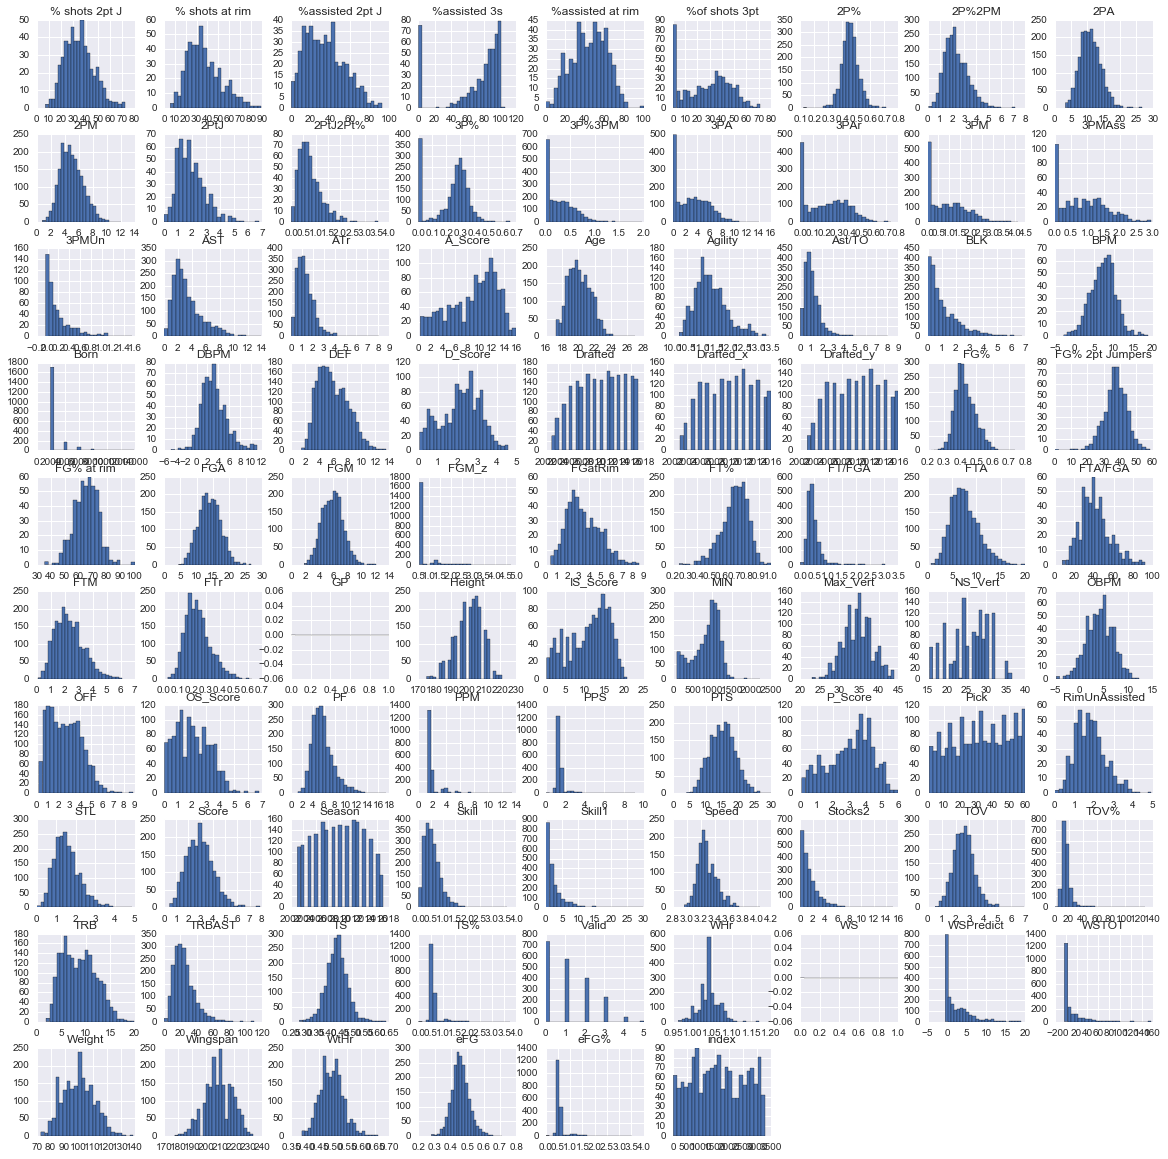

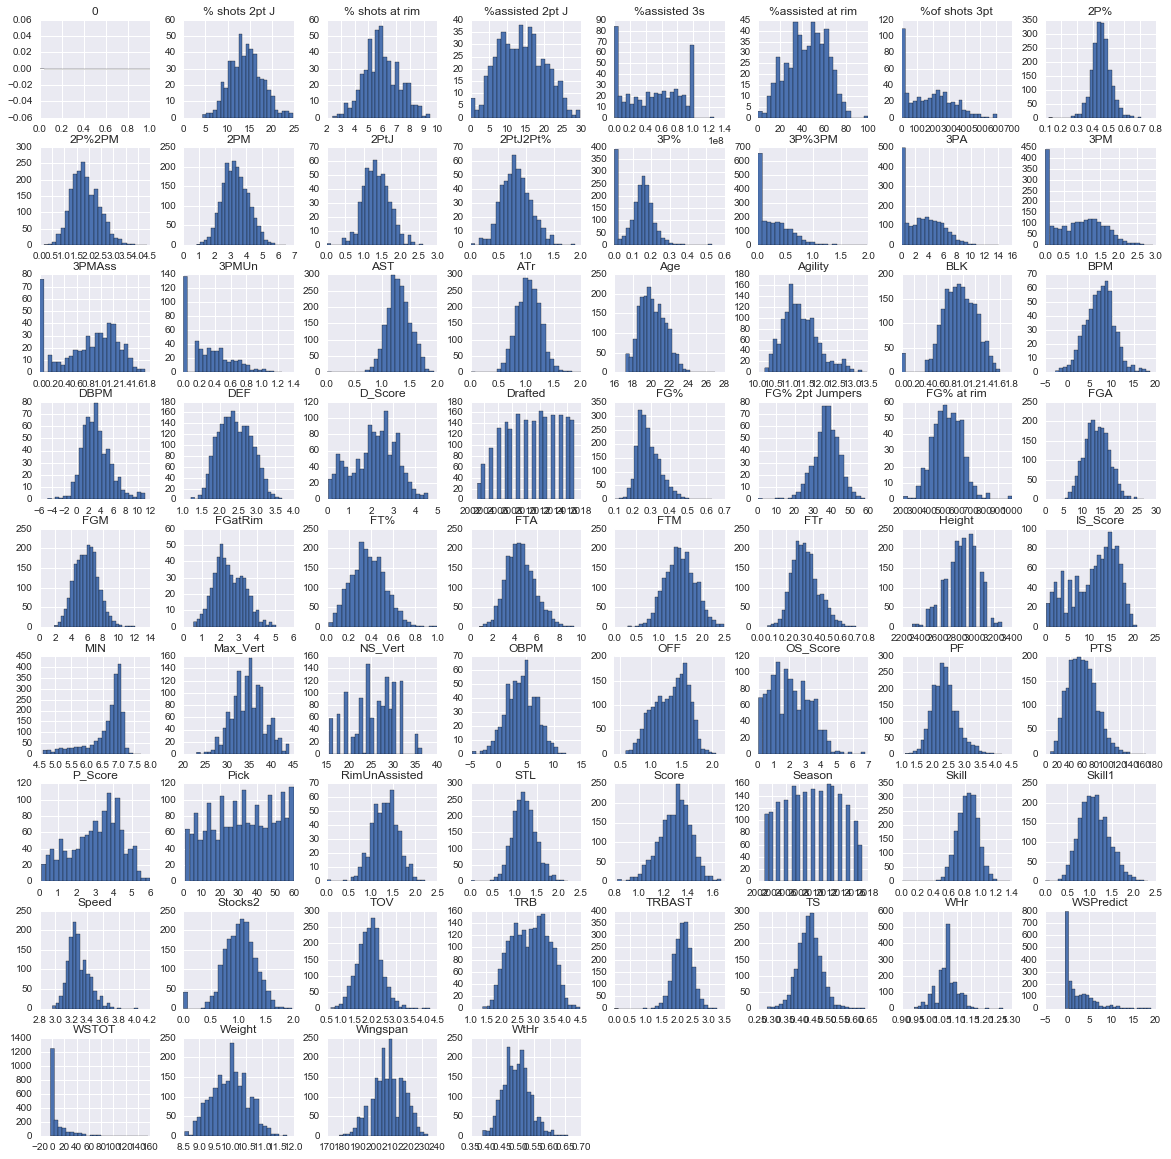

In [15]:
# Classify each feature by skew

none = df[['Url', 'Name', 'Age', 'Season', 'Drafted', 'Pick', 'League', 'WSPredict', 'WSTOT', 'FG% 2pt Jumpers', \
           'Max_Vert', 'NS_Vert', 'IS_Score', 'P_Score', 'D_Score', 'OS_Score', '%assisted at rim', \
           '3PA', 'FGA', 'FGM', 'WtHr', '3P%3PM', '2P%', 'TS', 'Speed', \
           'Agility', 'Wingspan', 'BPM', 'OBPM', 'DBPM']]

left_l = df[['FG%', 'FG% at rim', 'Height', 'WHr', '%of shots 3pt', '3P%', 'PTS']]

left = df[[]]

left_s = df[['FT%']]

left_ss = df[['%assisted 3s']]

right_l = df[['3PM', 'FTr', 'FGatRim', 'FTA', '% shots 2pt J', '%assisted 2pt J', 'TOV', '2P%2PM', '2PM']]

right = df[['FTM', '% shots at rim', 'PF', 'STL', '3PMUn', '3PMAss', \
            'RimUnAssisted', 'TRB', 'Weight', 'DEF', '2PtJ', '2PtJ2Pt%']]

right_s = df[['OFF', 'ATr']]

right_ss = df[['BLK', 'AST', 'Skill', 'Score', 'TRBAST', 'Stocks2', 'Skill1']]

log_min = df[['MIN']]

%matplotlib inline
hist = df.hist(figsize=(20, 20), bins=25)

# Feature transformations
one_point_five = lambda x: x**(1.5)
cube = lambda x: x**3
quart = lambda x: x**4
point_seven_five = lambda x: x**(0.75)
point_33 = lambda x: x**(0.33)
point_25 = lambda x: x**(0.25)
lmin = lambda x: np.log(x)

# Apply transformations
left_l2 = left_l.applymap(one_point_five)
left2 = left.applymap(np.square)
left_s2 = left_s.applymap(cube)
left_ss2 = left_ss.applymap(quart)

right_l2 = right_l.applymap(point_seven_five)
right2 = right.applymap(np.sqrt)
right_s2 = right_s.applymap(point_33)
right_ss2 = right_ss.applymap(point_25)

log_min2 = log_min.applymap(lmin)

df2 = pd.concat([none, left_l2, left2, left_s2, left_ss2, right_l2, right2, right_s2, right_ss2, log_min2], axis=1)

# Show transformed plot
hist2 = df2.hist(figsize=(20, 20), bins=25)

## Create Meta-Features

In [16]:
# Flag heaviest players
df = df2.set_index(['Name', 'Season']).reset_index()
heavy = df.loc[df['WtHr'] > df['WtHr'].quantile(.975)]
heavy['WeightFlag'] = 1
print set(heavy['Name'])
df = pd.concat([df, heavy]).groupby(['Url', 'Season']).first().reset_index()

set(['Babby Araujo', 'Joey Dorsey', 'Kevin Seraphin', 'Greg Oden', 'Guerschon Yabusele', 'DeJuan Blair', 'Sean May', 'Brandon Hunter', 'Mike Sweetney', 'Byron Mullens', 'Andre Drummond', 'Nikola Pekovic', 'Derrick Caracter', 'Jason Maxiell', 'Milan Macvan', 'Royce White', 'Dexter Pittman', 'Jahlil Okafor', 'Jusuf Nurkic', 'Tiny Gallon', 'Richard Hendrix', 'Glen Davis', 'Josh Harrellson'])


C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
# Create More Meta-Features
df['Skill'] = df['AST']*df['ATr']*df['TS']
df['Score'] = df['PTS']*df['TS']
df['Ath'] = df['FTr']*df['STL']*df['BLK']
df['Mix'] = df['AST']*df['TS']*df['STL']
df['Mix2'] = df['BLK']*df['TRB']*df['ATr']
df['Mix3'] = df['PTS']*df['ATr']*df['BLK']

df['Vert_adj'] = df['Max_Vert']*df['NS_Vert']
df['Move_adj'] = df['Speed']*df['Agility']

In [18]:
# ML algorithms won't handle NaN. Using absurd numbers gets us around the error.
df['Max_Vert'].fillna(100000, inplace=True)
df['NS_Vert'].fillna(100000, inplace=True)
df['Speed'].fillna(100000, inplace=True)
df['Agility'].fillna(100000, inplace=True)
df['BPM'].fillna(-100000, inplace=True)
df['OBPM'].fillna(-100000, inplace=True)
df['DBPM'].fillna(-100000, inplace=True)

In [19]:
# Output Dataframe to CSV
df.to_csv('data.csv')